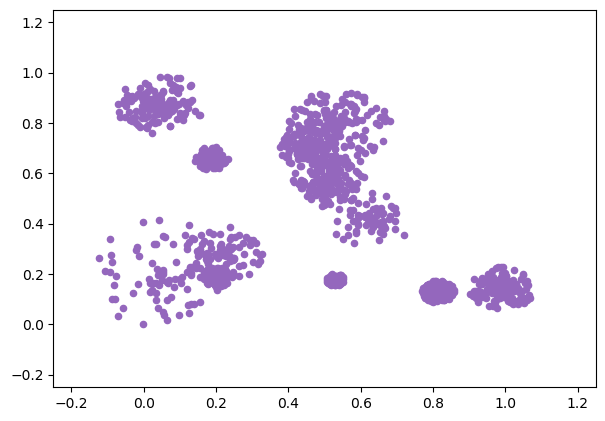

In [263]:
# Генерация множества точек на плоскости с несколькими сгущениями

import math

import random
# seed = 19654588
# np.random.seed(seed)
# random.seed(seed)

import numpy as np
import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

X = []
numOfClusters = random.randint(5, 20)
for i in range(0, numOfClusters):
    n = random.randint(60, 200)
    r = random.random() / 4
    centerX = random.random()
    centerY = random.random()
    
    randomDotR = np.random.rand(n) * r
    randomDotArg = np.random.rand(n) * 2 * math.pi
    X = X + [[centerX + randomDotR[i] * math.cos(randomDotArg[i]), centerY + randomDotR[i] * math.sin(randomDotArg[i])] for i in range(0, n)]
X = np.array(X)
    
axes = plt.gca()
axes.set_xlim([-0.25, 1.25])
axes.set_ylim([-0.25, 1.25])

plt.scatter(X[:, 0], X[:, 1], c = 'tab:purple', s = 20.0)
plt.show()

In [264]:
distances = []
for i in range(0, len(X)):
    distances.append([])
    for j in range(0, len(X)):
        distances[i].append(d(X[i], X[j]))

In [265]:
def d(X, Y):
    return ((X[0] - Y[0])**2 + (X[1] - Y[1])**2)**(1/2)

def differ(x, y):
    for i in range(0, len(x)):
        if (x[i] != y[i]):
            return True
    return False

def targetFunction(X, centers, labels):
    sum = 0
    for i in range(0, len(X)):
        sum += d(X[i], centers[labels[i]])
    return sum

In [266]:
from sklearn.cluster import KMeans

def kMeansMultiple(nClusters, X, nTrials):
    kmeans = KMeans(n_clusters=nClusters).fit(X)
    minLabels = kmeans.labels_
    minCenters = kmeans.cluster_centers_
    min = targetFunction(X, minCenters, minLabels)
    
    for i in range(0, nTrials):
        kmeans = KMeans(n_clusters=nClusters).fit(X)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_
        if (targetFunction(X, minCenters, minLabels) < min):
            minLabels = labels, minCenters = centers
    return (minLabels, minCenters)

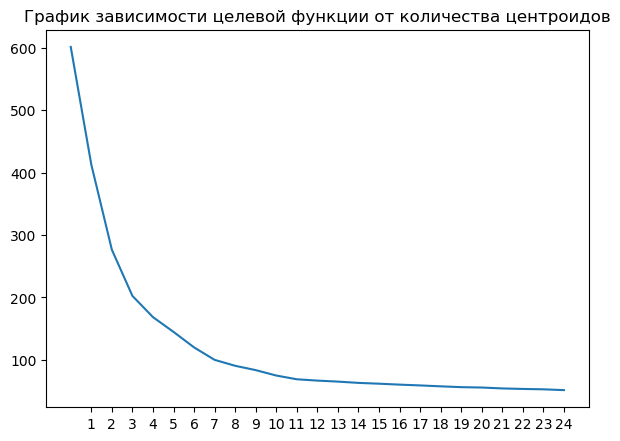

In [267]:
values = list()
maxClusters = 25

for i in range(1, maxClusters + 1):
    labels, centers = kMeansMultiple(i, X, 1)
    values.append(targetFunction(X, centers, labels))

plt.plot(values)
plt.title('График зависимости целевой функции от количества центроидов')
plt.xticks(np.arange(1,maxClusters, 1))
plt.show()

In [268]:
print("Таким образом в данной задаче оптимально выбрать 11 кластеров")

Таким образом в данной задаче оптимально выбрать 11 кластеров


In [284]:
def kMeansEpsilon(X, eps, nTrials):
    nClusters = 1
    labels, centers = kMeansMultiple(k, x, y, trials)
    curr = targetFunction(X, centers, labels)
    prev = curr - 8 * eps

    while (abs(curr - prev) > eps):
        nClusters += 1
        labels, centers = kMeansMultiple(k, x, y, trials)
        prev = curr
        curr = targetFunction(X, centers, labels)
    return (labels, centers)

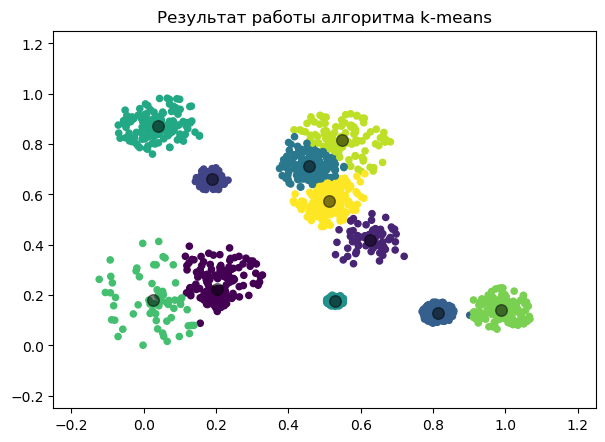

In [285]:
labelsKMeans, centersKMeans = kMeansMultiple(11, X, 10)

plt.scatter(X[:,0], X[:,1], c=labelsKMeans, s = 20.0)
plt.scatter(centersKMeans[:, 0], centersKMeans[:, 1], c='black', s=70, alpha=0.5)
    
axes = plt.gca()
axes.set_xlim([-0.25, 1.25])
axes.set_ylim([-0.25, 1.25])
plt.title('Результат работы алгоритма k-means')
plt.show()

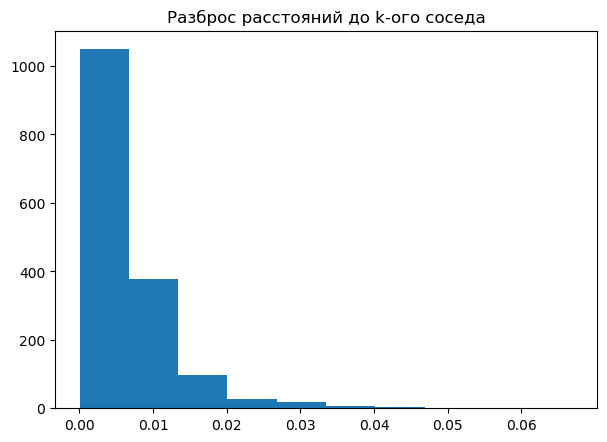

In [286]:
# Определение оптимального эпсилона через поиск k-соседей

from sklearn.neighbors import NearestNeighbors

kDistances, indices = NearestNeighbors(n_neighbors=2).fit(X).kneighbors(X)
kDistances.sort()
kDistances = kDistances[:,1]
    
kDistances.sort()
plt.hist(kDistances, bins = 10)
plt.xticks(np.arange(0,max(kDistances), 0.01))
plt.title("Разброс расстояний до k-ого соседа")
plt.show()

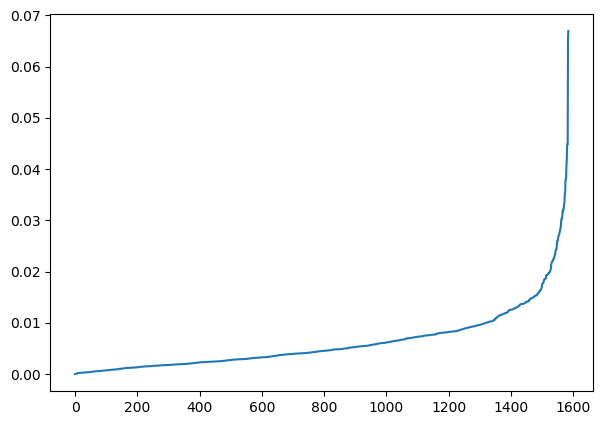

In [287]:
plt.plot(kDistances)

In [345]:
print("Большинство точек находятся на расстоянии до k-ого соседа меньшем, чем 0.045, поэтому можно взять eps = 0.045")
eps = 0.045

Большинство точек находятся на расстоянии до k-ого соседа меньшем, чем 0.045, поэтому можно взять eps = 0.045


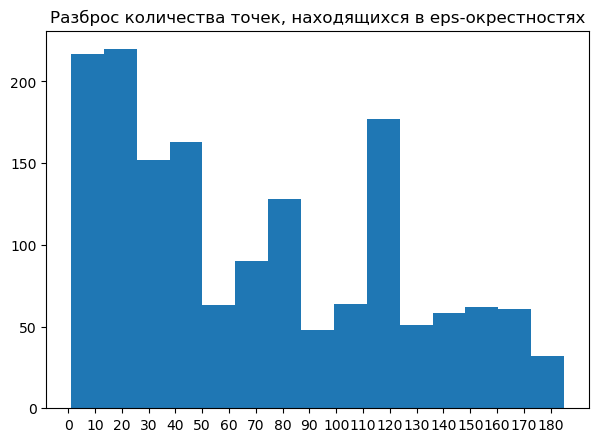

In [346]:
# Определение оптимального minPts

nEpsNeighbours = []
for i in range(0, len(X)):
    count = 0
    for j in range(0, len(X)):
        if (distances[i][j] < eps):
            count += 1
    nEpsNeighbours.append(count)
    
plt.hist(nEpsNeighbours, bins = 15)
plt.xticks(np.arange(0,max(nEpsNeighbours), 10))
plt.title("Разброс количества точек, находящихся в eps-окрестностях")
plt.show()

In [347]:
print("В качестве оптимального minPts было выбрано значение 10, чтобы отсечь основную массу шумовых точек, которые слишком далеки от своих соседей")
minPts = 10

В качестве оптимального minPts было выбрано значение 10, чтобы отсечь основную массу шумовых точек, которые слишком далеки от своих соседей


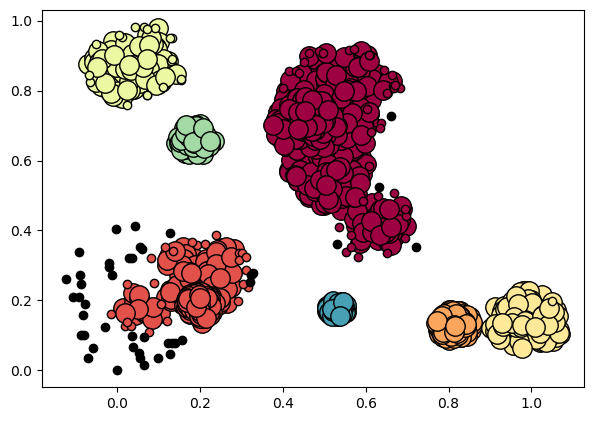

In [348]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps, minPts).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labelsDBSCAN = db.labels_

unique_labels = set(labelsDBSCAN)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labelsDBSCAN == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

In [349]:
from sklearn import metrics

print("Метрика Силуэт для алгоритма k-means: %0.3f", metrics.silhouette_score(X, labelsKMeans))
print("Метрика Силуэт для алгоритма DBSCAN: %0.3f", metrics.silhouette_score(X, labelsDBSCAN))

Метрика Силуэт для алгоритма k-means: %0.3f 0.6221958571291847
Метрика Силуэт для алгоритма DBSCAN: %0.3f 0.601013647034659
